Link to Excel file of extracted features: https://drive.google.com/drive/u/1/folders/1ZMbW7HxNkBUAlnT-_lXLD4J_r0A778SJ

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [2]:
# read in features csv file
df = pd.read_csv('v2_k_features.csv')
df

,Abs LFP,Abs HFP,nLFP,nHFP,LF/HF,RMSSD,label
0,399.630808,1030.815255,0.259320,0.668896,0.387684,932.041072,k_pre
1,441.917310,1290.276023,0.231605,0.676223,0.342498,951.616941,k_pre
2,494.573976,1338.031473,0.235009,0.635798,0.369628,959.359266,k_pre
3,386.074246,1127.115004,0.240370,0.701742,0.342533,939.579392,k_pre
4,450.423540,1258.882659,0.238126,0.665535,0.357796,952.273628,k_pre
...,...,...,...,...,...,...,...
91,223.552939,813.610805,0.192702,0.701331,0.274766,735.611693,k_med
92,275.481168,1015.442748,0.193928,0.714831,0.271292,766.606858,k_med
93,196.719824,1092.517596,0.141124,0.783755,0.180061,779.975532,k_med
94,253.493676,906.193736,0.199998,0.714956,0.279735,760.283782,k_med


<AxesSubplot:>

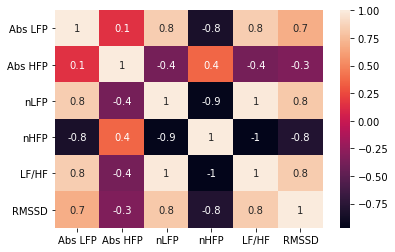

In [3]:
# df.corr()
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [4]:
# target variables
Y = df['label'].values
# features
X = df.drop(labels = ['label'], axis = 1)

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [5]:
arr = ["{}{}".format("PC", i) for i in np.arange(np.shape(df)[1]-1)+ 1]
(np.shape(df)[1]-1)+ 1
arr

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=arr)
dfp = pd.merge(df, pca_df, right_index=True, left_index=True)
print('Explained Variance Ratio')
for i in range(len(arr)):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.755424690919653
PC2: 0.18628028979113445
PC3: 0.04598107563260909
PC4: 0.009454755629221587
PC5: 0.0019431891851072953
PC6: 0.0009159988422744634


In [7]:
pca = PCA(.99)
X_pca = pca.fit_transform(X)
print('Explained Variance Ratio')
for i in range(len(arr)):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.755424690919653
PC2: 0.18628028979113445
PC3: 0.04598107563260909
PC4: 0.009454755629221587


IndexError: index 4 is out of bounds for axis 0 with size 4

In [8]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4'])
principalDf

,PC1,PC2,PC3,PC4
0,2.057512,1.086857,-0.572487,-0.184526
1,1.539110,-0.067351,-0.210851,0.112860
2,2.146767,-0.437672,-0.462437,0.517138
3,1.338936,0.759298,-0.186427,-0.298299
4,1.798063,0.024401,-0.331761,0.141257
...,...,...,...,...
91,-0.070477,2.493258,-0.667500,0.340677
92,-0.092987,1.538905,-0.445354,0.167768
93,-1.780877,1.510769,0.396559,0.084144
94,-0.006974,2.036793,-0.533125,0.080447


In [10]:
finalDf = pd.concat([principalDf, df['label']], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,label
0,2.057512,1.086857,-0.572487,-0.184526,k_pre
1,1.539110,-0.067351,-0.210851,0.112860,k_pre
2,2.146767,-0.437672,-0.462437,0.517138,k_pre
3,1.338936,0.759298,-0.186427,-0.298299,k_pre
4,1.798063,0.024401,-0.331761,0.141257,k_pre
...,...,...,...,...,...
91,-0.070477,2.493258,-0.667500,0.340677,k_med
92,-0.092987,1.538905,-0.445354,0.167768,k_med
93,-1.780877,1.510769,0.396559,0.084144,k_med
94,-0.006974,2.036793,-0.533125,0.080447,k_med


In [11]:
# save to a csv file
finalDf.to_csv('v2_k_pca_features.csv',index=False)